<a href="https://colab.research.google.com/github/rposhala/Recommender-System-on-MovieLens-dataset/blob/main/Item_based_Collaborative_Recommender_System_using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### KMeans clusteting model to build item-based collaborative Recommender System.

In [4]:
import os
import numpy as np
import pandas as pd
import pickle
from sklearn.cluster import KMeans
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
import time
start = time.time()

In [5]:
score_param = pd.read_csv("../data/movie_reco_scores.csv", sep = ',')
score_param.head(10)

,num_retraining,retraining_time_seconds,num_users,db_score_reco_user_15,db_score_reco_user_25,db_score_reco_user_35,db_score_reco_user_45,db_score_reco_movie_15,db_score_reco_movie_25,db_score_reco_movie_35,db_score_reco_movie_45,ch_score_reco_user_15,ch_score_reco_user_25,ch_score_reco_user_35,ch_score_reco_user_45,ch_score_reco_movie_15,ch_score_reco_movie_25,ch_score_reco_movie_35,ch_score_reco_movie_45
0,5,128,1031,0.49,0.47,0.48,0.49,0.50,0.46,0.47,0.50,4661223.31,8216597.87,11585096.11,14460864.73,2397366.70,4363759.47,6018190.88,7684525.94
1,4,103,1028,0.48,0.46,0.48,0.47,0.49,0.46,0.48,0.49,4799808.97,8224311.13,11597089.91,14870407.78,2398995.19,4325519.24,5948999.45,7233970.33
2,3,107,1025,0.48,0.47,0.48,0.49,0.51,0.47,0.48,0.49,4799547.16,8173292.35,11413949.36,14632536.44,2397836.74,4420995.60,5998433.92,7432989.03
3,2,120,1022,0.48,0.47,0.48,0.49,0.50,0.47,0.49,0.48,4798443.15,7923683.46,11328609.45,15287282.75,2426205.39,4408438.33,6114836.76,7596833.01
4,1,105,1017,0.48,0.46,0.48,0.48,0.49,0.47,0.48,0.49,4799630.92,8103524.14,11710949.65,14600583.88,2420551.32,4365204.24,5853676.87,7541252.13
5,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [6]:
df = score_param.drop(5)

Text(0, 0.5, 'retraining time (seconds)')

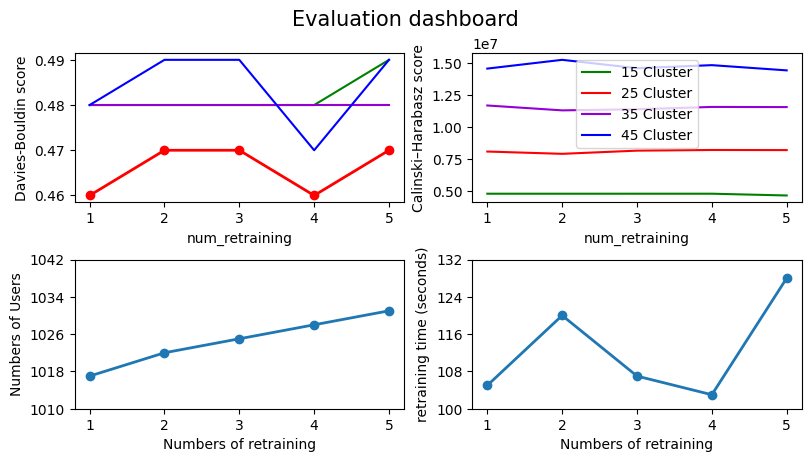

In [53]:
figure = plt.figure(figsize=(8, 6), layout='constrained')
plt.subplot(3,2,1)
# Get current axis
ax = plt.gca()
figure.suptitle('Evaluation dashboard', fontsize=15)
 
# line plot for math marks
df.plot(kind='line',
        x='num_retraining',
        y='db_score_reco_user_15',
        color='green', ax=ax)

df.plot(marker = 'o',
        x='num_retraining',
        y='db_score_reco_user_25', linewidth = 2,
        color='red', ax=ax)
df.plot(kind='line',
        x='num_retraining',
        y='db_score_reco_user_35',
        color='darkviolet', ax=ax)
df.plot(kind='line',
        x='num_retraining',
        y='db_score_reco_user_45',
        color='blue', ax=ax)

plt.ylabel("Davies-Bouldin score", fontsize = 10)
plt.legend('',frameon=False)

plt.subplot(3,2,2)
# Get current axis
ax = plt.gca()
 
# line plot for math marks
df.plot(kind='line',
        x='num_retraining',
        y='ch_score_reco_user_15',
        color='green', ax=ax)

df.plot(kind='line',
        x='num_retraining',
        y='ch_score_reco_user_25',
        color='red', ax=ax)
df.plot(kind='line',
        x='num_retraining',
        y='ch_score_reco_user_35',
        color='darkviolet', ax=ax)
df.plot(kind='line',
        x='num_retraining',
        y='ch_score_reco_user_45',
        color='blue', ax=ax)

plt.ylabel("Calinski–Harabasz score", fontsize = 10)
plt.legend( ('15 Cluster', '25 Cluster', '35 Cluster', '45 Cluster'))

plt.subplot(3,2,3)
c=plt.plot(df['num_retraining'], df['num_users'], '-o', linewidth = 2)
x=np.arange(1010,1050,8)
plt.yticks(x)
plt.xlabel("Numbers of retraining", fontsize = 10)
plt.ylabel("Numbers of Users", fontsize = 10)

plt.subplot(3,2,4)
c=plt.plot(df['num_retraining'], df['retraining_time_seconds'], '-o', linewidth = 2)
x=np.arange(100,140,8)
plt.yticks(x)
plt.xlabel("Numbers of retraining", fontsize = 10)
plt.ylabel("retraining time (seconds)", fontsize = 10)


In [17]:
df_score = pd.DataFrame({'num_retraining': 0,'retraining_time_seconds':0,'num_users':0,  'db_score_reco_user_15': 0, 'db_score_reco_user_25': 0, 'db_score_reco_user_35': 0, 'db_score_reco_user_45': 0, 'db_score_reco_movie_15': 0, 'db_score_reco_movie_25': 0, 'db_score_reco_movie_35': 0, 'db_score_reco_movie_45': 0, 'ch_score_reco_user_15': 0, 'ch_score_reco_user_25': 0, 'ch_score_reco_user_35': 0, 'ch_score_reco_user_45': 0, 'ch_score_reco_movie_15': 0, 'ch_score_reco_movie_25': 0, 'ch_score_reco_movie_35': 0, 'ch_score_reco_movie_45': 0,}, index=[0])
df_score.to_csv('../data/movie_reco_scores.csv', sep=',', encoding='utf-8', index=False)

#### Loading param

In [13]:
score_param = pd.read_csv("../data/movie_reco_scores.csv", sep = ',')
score_param.head()

,num_retraining,retraining_time_seconds,num_users,db_score_reco_user_15,db_score_reco_user_25,db_score_reco_user_35,db_score_reco_user_45,db_score_reco_movie_15,db_score_reco_movie_25,db_score_reco_movie_35,db_score_reco_movie_45,ch_score_reco_user_15,ch_score_reco_user_25,ch_score_reco_user_35,ch_score_reco_user_45,ch_score_reco_movie_15,ch_score_reco_movie_25,ch_score_reco_movie_35,ch_score_reco_movie_45
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
new_score = pd.DataFrame({'num_retraining': 1, 'retraining_time_seconds': 1, 'num_users':1,  'db_score_reco_user_15': 1, 'db_score_reco_user_25': 1, 'db_score_reco_user_35': 1, 'db_score_reco_user_45': 1, 'db_score_reco_movie_15': 1, 'db_score_reco_movie_25': 1, 'db_score_reco_movie_35': 1, 'db_score_reco_movie_45': 1, 'ch_score_reco_user_15': 1, 'ch_score_reco_user_25': 1, 'ch_score_reco_user_35': 1, 'ch_score_reco_user_45': 1, 'ch_score_reco_movie_15': 1, 'ch_score_reco_movie_25': 1, 'ch_score_reco_movie_35': 1, 'ch_score_reco_movie_45': 1}, index=[0])
print(new_score.head())



   num_retraining  retraining_time_seconds  num_users  db_score_reco_user_15  \
0               1                        1          1                      1   

   db_score_reco_user_25  db_score_reco_user_35  db_score_reco_user_45  \
0                      1                      1                      1   

   db_score_reco_movie_15  db_score_reco_movie_25  db_score_reco_movie_35  \
0                       1                       1                       1   

   db_score_reco_movie_45  ch_score_reco_user_15  ch_score_reco_user_25  \
0                       1                      1                      1   

   ch_score_reco_user_35  ch_score_reco_user_45  ch_score_reco_movie_15  \
0                      1                      1                       1   

   ch_score_reco_movie_25  ch_score_reco_movie_35  ch_score_reco_movie_45  
0                       1                       1                       1  


In [ ]:
score_param = pd.concat([new_score,score_param.loc[:]])

score_param.to_csv('../data/movie_reco_scores.csv', sep=',', encoding='utf-8', index=False)

In [14]:
score_param.loc[:]

,num_retraining,retraining_time_seconds,num_users,db_score_reco_user_15,db_score_reco_user_25,db_score_reco_user_35,db_score_reco_user_45,db_score_reco_movie_15,db_score_reco_movie_25,db_score_reco_movie_35,db_score_reco_movie_45,ch_score_reco_user_15,ch_score_reco_user_25,ch_score_reco_user_35,ch_score_reco_user_45,ch_score_reco_movie_15,ch_score_reco_movie_25,ch_score_reco_movie_35,ch_score_reco_movie_45
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
score_param.head()

,num_retraining,retraining_time_seconds,num_users,db_score_reco_user_15,db_score_reco_user_25,db_score_reco_user_35,db_score_reco_user_45,db_score_reco_movie_15,db_score_reco_movie_25,db_score_reco_movie_35,db_score_reco_movie_45,ch_score_reco_user_15,ch_score_reco_user_25,ch_score_reco_user_35,ch_score_reco_user_45,ch_score_reco_movie_15,ch_score_reco_movie_25,ch_score_reco_movie_35,ch_score_reco_movie_45,ch_score_reco_movie_25
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0,1,1,NaN
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0,1,1,NaN
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0,1,1,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0.0


## Loading refined_dataset

In [2]:
refined_dataset = pd.read_csv("../data/refined_dataset.csv")

#### Working test a small dataset

In [3]:
refined_dataset = refined_dataset.loc[0:1000000,:]

In [4]:
refined_dataset = refined_dataset.drop('Unnamed: 0', axis='columns')

### Recommender System by User
#### Inputs = userId
#### output = 5 movies

In [5]:
dataset_user = refined_dataset.loc[:, ['movieId', 'rating']] 

In [6]:
kmeans_user = KMeans(25)
kmeans_user.fit(dataset_user)

# Get the cluster labels
labels = kmeans_user.labels_

# Calculate Davies-Bouldin Index
db_score_reco_user = davies_bouldin_score(dataset_user, labels)

# Calculate silhouette score
#si_score = silhouette_score(dataset_user, labels)
#print("Silhouette score:", si_score)

ch_score_reco_user = calinski_harabasz_score(dataset_user, labels)


C:\Users\rafae\Desktop\MLOps\PF\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Davies-Bouldin score: 0.4551964714730443
Calinski Harabasz score: 8366490.908058339


In [7]:
identified_users= kmeans_user.fit_predict(dataset_user)
identified_users = list(identified_users)

C:\Users\rafae\Desktop\MLOps\PF\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [8]:
refined_dataset['loc_clusters_users'] = identified_users

### Recommender System by Movie
#### Inputs = movieId
#### Output = 5 movies

In [9]:
dataset_movie = refined_dataset.loc[:, ['userId', 'rating']] 

In [10]:
kmeans_movie = KMeans(25)
kmeans_movie.fit(dataset_user)

# Get the cluster labels
labels = kmeans_movie.labels_

# Calculate Davies-Bouldin Index
db_score_reco_movie = davies_bouldin_score(dataset_movie, labels)

# Calculate silhouette score
#si_score = silhouette_score(dataset_movie, labels)
#print("Silhouette score:", si_score)

ch_score_reco_movie = calinski_harabasz_score(dataset_movie, labels)

C:\Users\rafae\Desktop\MLOps\PF\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Davies-Bouldin score: 1482.8706089044347
Calinski Harabasz score: 18.631486458567313


In [11]:
identified_movies = kmeans_movie.fit_predict(dataset_movie)
identified_movies = list(identified_movies)

C:\Users\rafae\Desktop\MLOps\PF\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [12]:
refined_dataset['loc_clusters_movies'] = identified_movies

### Export the model 

In [13]:
with open("../models/kmeans_movie.pkl", "wb") as f:
    pickle.dump(kmeans_movie, f)

In [14]:
with open("../models/kmeans_user.pkl", "wb") as f:
    pickle.dump(kmeans_user, f)

### Export the final_db ti csv and pickle

In [15]:
final_db = refined_dataset

In [16]:
final_db.to_pickle("../data/final_db.pkl")

In [17]:
final_db.to_csv('../data/final_db.csv', sep=',', encoding='utf-8', index=False)

### Adding param to score csv

In [37]:
retrain = score_param['retrain'].max() + 1
new_row = {'retrain': retrain, 'db_score_reco_user': db_score_reco_user, 'ch_score_reco_user': ch_score_reco_user, 'db_score_reco_movie': db_score_reco_movie, 'ch_score_reco_movie': ch_score_reco_movie}
#print(new_row)
score_param = score_param.append(new_row, ignore_index=True)
score_param.to_csv('../data/movie_reco_scores.csv', sep=',', encoding='utf-8', index=False)

C:\Users\rafae\AppData\Local\Temp\ipykernel_7020\3250484708.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_param = score_param.append(new_row, ignore_index=True)


In [38]:
end = time.time()

print('Retrain done in :',end - start, 'seconds')

Retrain done in : 167.28042316436768 seconds
